In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1 as tf
import pandas as pd
import numpy as np
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython.display import clear_output
from time import sleep
%matplotlib inline

In [2]:
os.listdir(os.getcwd())

['.Rhistory',
 'network.gv',
 'Week_5_Task.ipynb',
 '.DS_Store',
 'churn.Rmd',
 'Artificial Neural Networks (ANN).ipynb',
 'Untitled3.ipynb',
 'Untitled.ipynb',
 'Multilayer ANN.ipynb',
 'corona_route.csv',
 'Untitled2.ipynb',
 'Cirrhosis.Rmd',
 'corona_time.csv',
 '2 Layer NN using pytorch.ipynb',
 'rds_cred_Cirrhosis.json',
 'Cirrhosis',
 'ANN with Tensorflow.ipynb',
 'Cirrhosis.zip',
 '.RData',
 'rds_cred_Corona.json',
 'cirrhosis.csv',
 'Copy of ANN_WithDerivatives.ipynb',
 '.ipynb_checkpoints',
 'rds_cred_FakeBank.json',
 'Corona.Rmd',
 'My_ANN.ipynb',
 'corona_patients.csv',
 'churn.csv']

In [3]:
#data 
data = pd.read_csv('churn.csv')
data.head(5)

,Unnamed: 0,index,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#drop some columns
data = data.drop('index', axis = 1)
data = data.drop('RowNumber', axis = 1)
data = data.drop('Unnamed: 0', axis = 1)
data = data.drop ('Surname', axis = 1)
data = data.drop('CustomerId', axis = 1)

In [5]:
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1}) # one hot encoding

In [6]:
data['Geography'] = data['Geography'].map({'France': 1, 'Spain': 2, 'Germany': 3})

In [223]:
data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [228]:
no_exit = (7963/(7963+2037))*100
print (no_exit)
exit = (2037/(7963+2037))*100
print (exit)

79.63
20.369999999999997


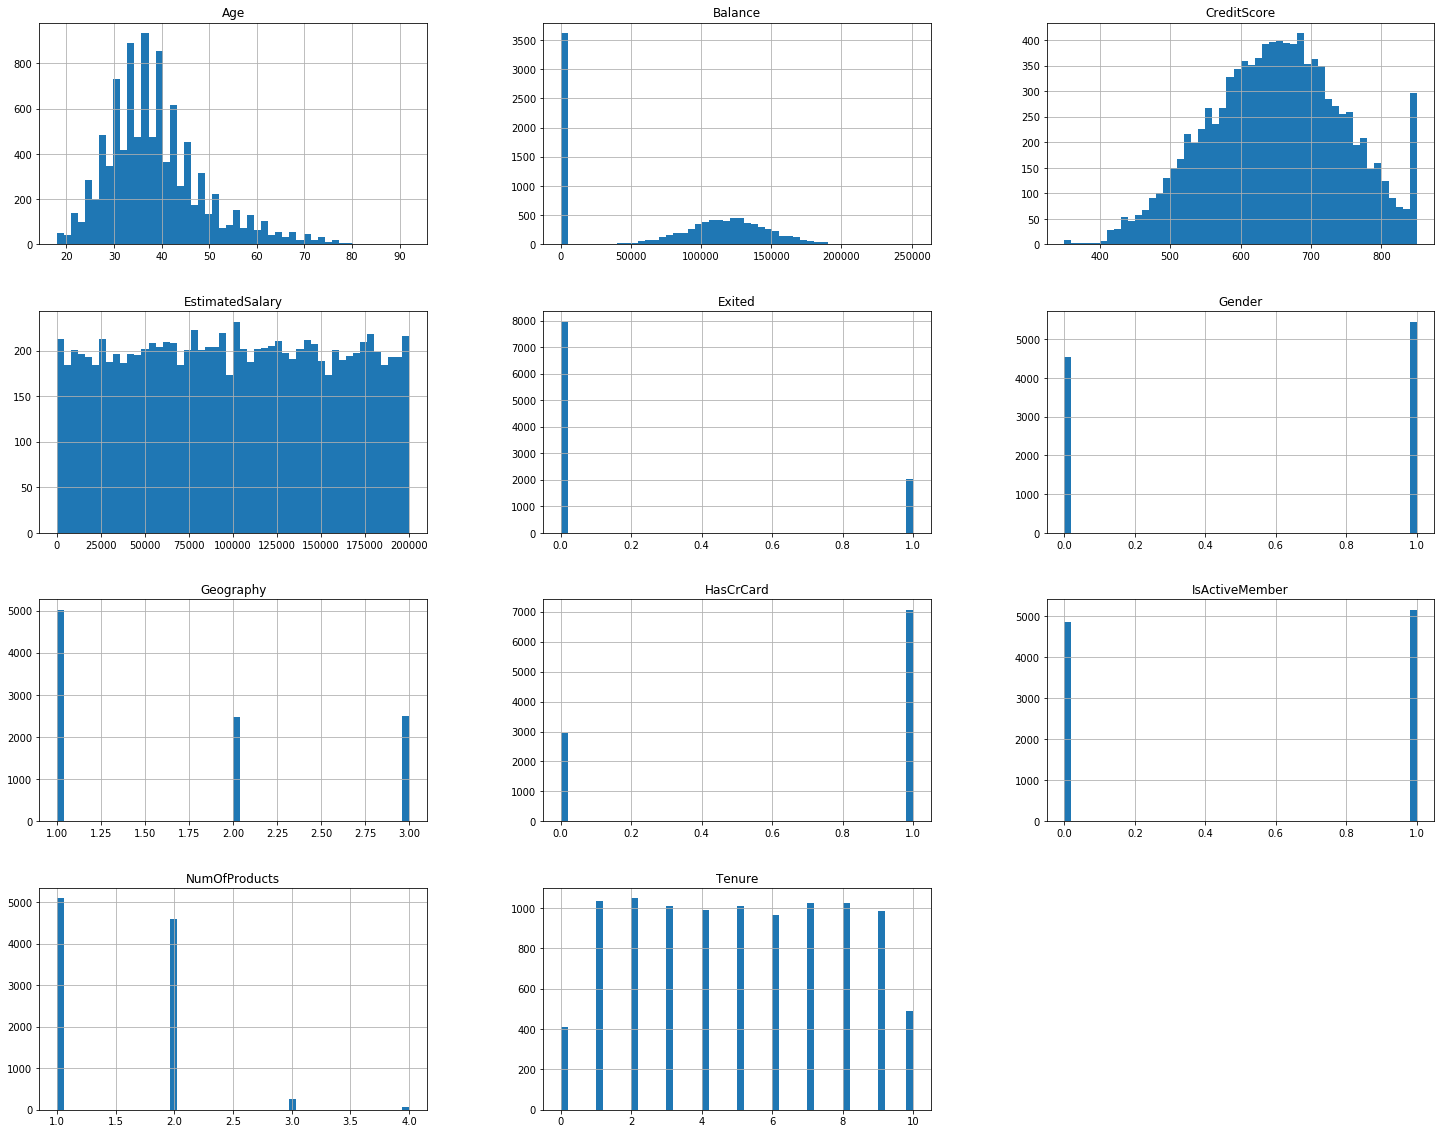

In [212]:
data.hist(bins = 50, figsize = (25, 20))
plt.show()

In [8]:
y = np.array(data['Exited'])

In [9]:
x = data.iloc[:, :-1]

In [10]:
x = x.to_numpy()

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

In [13]:
def linear(H):
    return H

def ReLu(H):
    return H*(H>0)

def softmax(H):
    eH = np.exp(H)
    return eH/eH.sum(axis = 1, keepdims = True)

def stable_softmax(H):
    eH = np.exp(H - np.max(H))
    return eH / eH.sum(axis = 1, keepdims = True)
    

def sigmoid(H):

  return 1/(1 + np.exp(-H))


# only works for 0 and 1
#def cross_entropy (Y, p_hat):
#    return -np.sum(Y*np.log(p_hat))
# work for general case
def cross_entropy(Y, p_hat):
  return -(1/len(Y))*np.sum(Y*np.log(p_hat))

def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    Y = np.zeros((N,K))
    
    for i in range (N):
        Y[i, y[i]] = 1
    return Y

def accuracy (y, y_hat):
    return np.mean(y == y_hat)

def OLS(Y, Y_hat):
    return (1/(2*len(Y)))*np.sum((Y-Y_hat)**2)

def R2(y, y_hat):
    return sqrt((y - y_hat)**2)

def derivative(Z, a):
  if a == "linear":
    return 1
  elif a == sigmoid :
    return Z*(1-Z)
  elif a==np.tanh :
    return 1 - Z*Z
  elif a == ReLu:
    return (Z>0).astype(int)
  else:
    ValueError("Unknown activation")
  

In [14]:
class ANN():

  def __init__(self, architecture, activations = None, mode = 0):
    self.mode = mode
    self.architecture = architecture
    self.L = len( architecture) +1
    self.activations = activations

  def fit(self, X, y, eta= 1e-3, epochs = 1e3, show_curve = False):
    epochs = int(epochs)

    if self.mode:
      Y = y
    else: 
      Y = one_hot_encode(y)
    
    N, D = X.shape
    K = Y.shape[1]

    self.W = {l: np.random.randn(M[0], M[1]) for l, M in enumerate(zip(([D]+self.architecture),(self.architecture + [K])), 1)}
        
    self.b = {l: np.random.randn(M) for l, M in enumerate(self.architecture + [K], 1)}

    if self.activations is None:
      self.a = {l: ReLu for l in range(1, self.L)}
    else:
      self.a = {l: act for l, act in enumerate(self.activations, 1)}

    if self.mode:
      self.a[self.L] = linear
    else:
      self.a[self.L] = softmax

    J = np.zeros(epochs)

    for epoch in range(epochs):
      self.forward(X)

      if self.mode:
        J[epoch] = OLS(Y, self.Z[self.L]) 
      else:
        J[epoch] = cross_entropy(Y, self.Z[self.L])

      dH = (1/N)*(self.Z[self.L] - Y)

      for l in sorted(self.W.keys(), reverse= True):
        dW = self.Z[l-1].T @ dH
        db = dH.sum(axis = 0)
        
        self.W[l] -= eta*dW
        self.b[l] -= eta*db

        if l>1:
          dZ = dH@(self.W[l]).T
          dH = dZ*derivative(self.Z[l-1], self.a[l-1])

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("Loss function")
      plt.show


  def forward(self, X):
    
    self.Z ={0:X}

    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+ self.b[l] )
  
  def predict(self, X):

    self.forward(X)

    if self.mode:
      return self.Z[self.L]
    else:
      return self.Z[self.L].argmax(axis = 1)


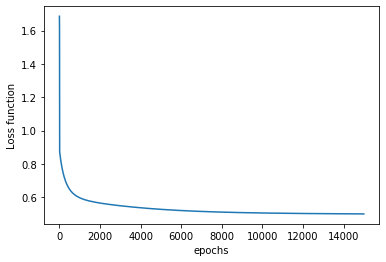

In [139]:
ann = ANN([8,8,8], [ReLu, np.tanh, np.tanh] )
ann.fit(x_train, y_train, epochs = 15000, show_curve = True)

In [140]:
y_hat = ann.predict(x_test)

In [141]:
print(f"Training Accuracy: {accuracy(y_test, y_hat): 0.4f}")

Training Accuracy:  0.7830


In [142]:
from sklearn.metrics import confusion_matrix

In [143]:
cm = confusion_matrix(y_test, y_hat)
print (cm)

[[1566    1]
 [ 433    0]]


In [144]:
from sklearn.metrics import classification_report

In [145]:
print (classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1567
           1       0.00      0.00      0.00       433

    accuracy                           0.78      2000
   macro avg       0.39      0.50      0.44      2000
weighted avg       0.61      0.78      0.69      2000



In [68]:
#ANN Using keras 

In [69]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

In [147]:
#set seed
numpy.r3andom.seed(7)

In [148]:
model = Sequential()
model.add(Dense(15, input_dim=10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [155]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [157]:
# Fit the model
model.fit(x_train, y_train, epochs=10000, batch_size=10)

Epoch 1/10000
8000/8000 [==============================] - 2s 226us/step - loss: 0.5086 - accuracy: 0.7995
Epoch 2/10000
8000/8000 [==============================] - 1s 177us/step - loss: 0.5006 - accuracy: 0.7995
Epoch 3/10000
8000/8000 [==============================] - 1s 179us/step - loss: 0.5006 - accuracy: 0.7994
Epoch 4/10000
8000/8000 [==============================] - 2s 200us/step - loss: 0.5006 - accuracy: 0.7995
Epoch 5/10000
8000/8000 [==============================] - 1s 180us/step - loss: 0.5007 - accuracy: 0.79950s
Epoch 6/10000
8000/8000 [==============================] - 1s 183us/step - loss: 0.5007 - accuracy: 0.7995
Epoch 7/10000
8000/8000 [==============================] - 2s 214us/step - loss: 0.5006 - accuracy: 0.7995
Epoch 8/10000
8000/8000 [==============================] - 2s 215us/step - loss: 0.5007 - accuracy: 0.7995
Epoch 9/10000
8000/8000 [==============================] - 1s 174us/step - loss: 0.5013 - accuracy: 0.7995
Epoch 10/10000
8000/8000 [=========

8000/8000 [==============================] - 1s 142us/step - loss: 0.5005 - accuracy: 0.7995
Epoch 149/10000
8000/8000 [==============================] - 1s 151us/step - loss: 0.5007 - accuracy: 0.7995
Epoch 150/10000
8000/8000 [==============================] - 1s 181us/step - loss: 0.5005 - accuracy: 0.7995
Epoch 151/10000
8000/8000 [==============================] - 2s 203us/step - loss: 0.5006 - accuracy: 0.7995
Epoch 152/10000
8000/8000 [==============================] - 1s 162us/step - loss: 0.5018 - accuracy: 0.7995
Epoch 153/10000
8000/8000 [==============================] - 1s 158us/step - loss: 0.5003 - accuracy: 0.7995
Epoch 154/10000
8000/8000 [==============================] - 1s 154us/step - loss: 0.5004 - accuracy: 0.7995
Epoch 155/10000
8000/8000 [==============================] - 1s 156us/step - loss: 0.5004 - accuracy: 0.7995
Epoch 156/10000
8000/8000 [==============================] - 2s 223us/step - loss: 0.5019 - accuracy: 0.7995
Epoch 157/10000
8000/8000 [========

8000/8000 [==============================] - 2s 189us/step - loss: 0.5023 - accuracy: 0.7995
Epoch 298/10000
8000/8000 [==============================] - 1s 173us/step - loss: 0.4999 - accuracy: 0.7995
Epoch 299/10000
8000/8000 [==============================] - 1s 162us/step - loss: 0.4990 - accuracy: 0.7995
Epoch 300/10000
8000/8000 [==============================] - 1s 163us/step - loss: 0.4965 - accuracy: 0.7995
Epoch 301/10000
8000/8000 [==============================] - 1s 168us/step - loss: 0.4950 - accuracy: 0.7995
Epoch 302/10000
8000/8000 [==============================] - 1s 164us/step - loss: 0.4940 - accuracy: 0.7995
Epoch 303/10000
8000/8000 [==============================] - 1s 164us/step - loss: 0.4940 - accuracy: 0.7995
Epoch 304/10000
8000/8000 [==============================] - 1s 163us/step - loss: 0.4935 - accuracy: 0.7995
Epoch 305/10000
8000/8000 [==============================] - 1s 168us/step - loss: 0.4933 - accuracy: 0.7995
Epoch 306/10000
8000/8000 [========

8000/8000 [==============================] - 1s 162us/step - loss: 0.4924 - accuracy: 0.7995
Epoch 446/10000
8000/8000 [==============================] - 1s 168us/step - loss: 0.4999 - accuracy: 0.7995
Epoch 447/10000
8000/8000 [==============================] - 1s 172us/step - loss: 0.5001 - accuracy: 0.7995
Epoch 448/10000
8000/8000 [==============================] - 1s 166us/step - loss: 0.5000 - accuracy: 0.7995
Epoch 449/10000
8000/8000 [==============================] - 1s 162us/step - loss: 0.4998 - accuracy: 0.7995
Epoch 450/10000
8000/8000 [==============================] - 1s 164us/step - loss: 0.5000 - accuracy: 0.7995
Epoch 451/10000
8000/8000 [==============================] - 1s 170us/step - loss: 0.5001 - accuracy: 0.7995
Epoch 452/10000
8000/8000 [==============================] - 1s 166us/step - loss: 0.5000 - accuracy: 0.7995
Epoch 453/10000
8000/8000 [==============================] - 1s 168us/step - loss: 0.5002 - accuracy: 0.7995
Epoch 454/10000
8000/8000 [========

8000/8000 [==============================] - 2s 188us/step - loss: 0.5001 - accuracy: 0.7995
Epoch 594/10000
8000/8000 [==============================] - 1s 175us/step - loss: 0.4999 - accuracy: 0.7995
Epoch 595/10000
8000/8000 [==============================] - 1s 174us/step - loss: 0.5000 - accuracy: 0.7995
Epoch 596/10000
8000/8000 [==============================] - 1s 159us/step - loss: 0.5006 - accuracy: 0.7995
Epoch 597/10000
8000/8000 [==============================] - 1s 159us/step - loss: 0.4999 - accuracy: 0.7995
Epoch 598/10000
8000/8000 [==============================] - 2s 189us/step - loss: 0.5000 - accuracy: 0.7995
Epoch 599/10000
8000/8000 [==============================] - 1s 159us/step - loss: 0.5000 - accuracy: 0.7995
Epoch 600/10000
8000/8000 [==============================] - 1s 164us/step - loss: 0.5000 - accuracy: 0.7995
Epoch 601/10000
8000/8000 [==============================] - 1s 171us/step - loss: 0.5009 - accuracy: 0.7995
Epoch 602/10000
8000/8000 [========

8000/8000 [==============================] - 1s 180us/step - loss: 0.4924 - accuracy: 0.7995
Epoch 741/10000
8000/8000 [==============================] - 2s 225us/step - loss: 0.4923 - accuracy: 0.7995
Epoch 742/10000
8000/8000 [==============================] - 2s 207us/step - loss: 0.4922 - accuracy: 0.7995
Epoch 743/10000
8000/8000 [==============================] - 2s 256us/step - loss: 0.4993 - accuracy: 0.7995
Epoch 744/10000
8000/8000 [==============================] - 1s 169us/step - loss: 0.4931 - accuracy: 0.7995
Epoch 745/10000
8000/8000 [==============================] - 1s 154us/step - loss: 0.4929 - accuracy: 0.7995
Epoch 746/10000
8000/8000 [==============================] - 1s 180us/step - loss: 0.4929 - accuracy: 0.7995
Epoch 747/10000
8000/8000 [==============================] - 1s 141us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 748/10000
8000/8000 [==============================] - 1s 150us/step - loss: 0.4929 - accuracy: 0.7995
Epoch 749/10000
8000/8000 [========

8000/8000 [==============================] - 1s 138us/step - loss: 0.5007 - accuracy: 0.7995
Epoch 816/10000
8000/8000 [==============================] - 1s 148us/step - loss: 0.5000 - accuracy: 0.7995
Epoch 817/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.4999 - accuracy: 0.7995
Epoch 818/10000
8000/8000 [==============================] - 1s 139us/step - loss: 0.4999 - accuracy: 0.7995
Epoch 819/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.5168 - accuracy: 0.7995
Epoch 820/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.5001 - accuracy: 0.7995
Epoch 821/10000
8000/8000 [==============================] - 1s 137us/step - loss: 0.4999 - accuracy: 0.7995
Epoch 822/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.4999 - accuracy: 0.7995
Epoch 823/10000
8000/8000 [==============================] - 1s 139us/step - loss: 0.4999 - accuracy: 0.7995
Epoch 824/10000
8000/8000 [========

Epoch 965/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.4921 - accuracy: 0.7995
Epoch 966/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.4922 - accuracy: 0.7995
Epoch 967/10000
8000/8000 [==============================] - 1s 145us/step - loss: 0.4926 - accuracy: 0.7995
Epoch 968/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.4920 - accuracy: 0.7995
Epoch 969/10000
8000/8000 [==============================] - 1s 137us/step - loss: 0.5005 - accuracy: 0.7995
Epoch 970/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.5002 - accuracy: 0.7995
Epoch 971/10000
8000/8000 [==============================] - 1s 149us/step - loss: 0.5012 - accuracy: 0.7995
Epoch 972/10000
8000/8000 [==============================] - 1s 144us/step - loss: 0.5004 - accuracy: 0.7995
Epoch 973/10000
8000/8000 [==============================] - 1s 140us/step - loss: 0.5004 - accuracy: 0.7995
Epoch 974/10000
800

8000/8000 [==============================] - 1s 160us/step - loss: 0.5002 - accuracy: 0.7995
Epoch 1114/10000
8000/8000 [==============================] - 1s 162us/step - loss: 0.5002 - accuracy: 0.7995
Epoch 1115/10000
8000/8000 [==============================] - 2s 191us/step - loss: 0.5001 - accuracy: 0.7995
Epoch 1116/10000
8000/8000 [==============================] - 1s 179us/step - loss: 0.4999 - accuracy: 0.7995
Epoch 1117/10000
8000/8000 [==============================] - 1s 168us/step - loss: 0.5008 - accuracy: 0.7995
Epoch 1118/10000
8000/8000 [==============================] - 1s 176us/step - loss: 0.5000 - accuracy: 0.7995
Epoch 1119/10000
8000/8000 [==============================] - 1s 161us/step - loss: 0.5006 - accuracy: 0.7995
Epoch 1120/10000
8000/8000 [==============================] - 1s 160us/step - loss: 0.4999 - accuracy: 0.7995
Epoch 1121/10000
8000/8000 [==============================] - 1s 163us/step - loss: 0.5005 - accuracy: 0.7995
Epoch 1122/10000
8000/8000 

8000/8000 [==============================] - 1s 164us/step - loss: 0.5007 - accuracy: 0.7995
Epoch 1261/10000
8000/8000 [==============================] - 1s 174us/step - loss: 0.5103 - accuracy: 0.7995
Epoch 1262/10000
8000/8000 [==============================] - 1s 158us/step - loss: 0.4999 - accuracy: 0.7995
Epoch 1263/10000
8000/8000 [==============================] - 1s 171us/step - loss: 0.4997 - accuracy: 0.7995
Epoch 1264/10000
8000/8000 [==============================] - 1s 157us/step - loss: 0.4998 - accuracy: 0.7995
Epoch 1265/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4997 - accuracy: 0.7995
Epoch 1266/10000
8000/8000 [==============================] - 1s 156us/step - loss: 0.4998 - accuracy: 0.7995
Epoch 1267/10000
8000/8000 [==============================] - 1s 154us/step - loss: 0.4999 - accuracy: 0.7995
Epoch 1268/10000
8000/8000 [==============================] - 1s 142us/step - loss: 0.5005 - accuracy: 0.7995
Epoch 1269/10000
8000/8000 

8000/8000 [==============================] - 1s 180us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 1409/10000
8000/8000 [==============================] - 1s 174us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 1410/10000
8000/8000 [==============================] - 1s 176us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 1411/10000
8000/8000 [==============================] - 2s 278us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 1412/10000
8000/8000 [==============================] - 2s 206us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 1413/10000
8000/8000 [==============================] - 1s 168us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 1414/10000
8000/8000 [==============================] - 3s 324us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 1415/10000
8000/8000 [==============================] - 3s 337us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 1416/10000
8000/8000 [==============================] - 2s 265us/step - loss: 0.4928 - accuracy: 0.79951s - loss: 0.4 - ETA: 
Epoch

8000/8000 [==============================] - 1s 182us/step - loss: 0.5000 - accuracy: 0.79950s - loss: 0.4968 - ac
Epoch 1557/10000
8000/8000 [==============================] - 2s 260us/step - loss: 0.5001 - accuracy: 0.7995
Epoch 1558/10000
8000/8000 [==============================] - 1s 187us/step - loss: 0.5000 - accuracy: 0.7995
Epoch 1559/10000
8000/8000 [==============================] - 1s 173us/step - loss: 0.5001 - accuracy: 0.7995
Epoch 1560/10000
8000/8000 [==============================] - 2s 224us/step - loss: 0.5000 - accuracy: 0.7995
Epoch 1561/10000
8000/8000 [==============================] - 1s 180us/step - loss: 0.5001 - accuracy: 0.7995
Epoch 1562/10000
8000/8000 [==============================] - 1s 183us/step - loss: 0.5004 - accuracy: 0.79951s - loss: 0.5049 - accura - ETA: 
Epoch 1563/10000
8000/8000 [==============================] - 1s 174us/step - loss: 0.5003 - accuracy: 0.7995
Epoch 1564/10000
8000/8000 [==============================] - 1s 165us/step - los

8000/8000 [==============================] - 1s 143us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 1704/10000
8000/8000 [==============================] - 1s 141us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 1705/10000
8000/8000 [==============================] - 1s 137us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 1706/10000
8000/8000 [==============================] - 1s 139us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 1707/10000
8000/8000 [==============================] - 1s 142us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 1708/10000
8000/8000 [==============================] - 1s 137us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 1709/10000
8000/8000 [==============================] - 1s 139us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 1710/10000
8000/8000 [==============================] - 1s 137us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 1711/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 1712/10000
8000/8000 

8000/8000 [==============================] - 1s 137us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 1851/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 1852/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 1853/10000
8000/8000 [==============================] - 1s 144us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 1854/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 1855/10000
8000/8000 [==============================] - 1s 137us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 1856/10000
8000/8000 [==============================] - 1s 141us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 1857/10000
8000/8000 [==============================] - 1s 141us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 1858/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 1859/10000
8000/8000 

8000/8000 [==============================] - 1s 138us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 1999/10000
8000/8000 [==============================] - 1s 137us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2000/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 2001/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2002/10000
8000/8000 [==============================] - 1s 137us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2003/10000
8000/8000 [==============================] - 1s 137us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2004/10000
8000/8000 [==============================] - 1s 137us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2005/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2006/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2007/10000
8000/8000 

8000/8000 [==============================] - 1s 165us/step - loss: 0.4929 - accuracy: 0.79950s - loss: 0.4916 - accuracy: 
Epoch 2145/10000
8000/8000 [==============================] - 1s 164us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2146/10000
8000/8000 [==============================] - 1s 161us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2147/10000
8000/8000 [==============================] - 1s 163us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2148/10000
8000/8000 [==============================] - 1s 164us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2149/10000
8000/8000 [==============================] - 1s 183us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2150/10000
8000/8000 [==============================] - 1s 167us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 2151/10000
8000/8000 [==============================] - 1s 167us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2152/10000
8000/8000 [==============================] - 1s 162us/step - loss: 0.4928 - accuracy: 0.79

8000/8000 [==============================] - 1s 162us/step - loss: 0.4928 - accuracy: 0.79950s - loss: 0.4
Epoch 2290/10000
8000/8000 [==============================] - 1s 163us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2291/10000
8000/8000 [==============================] - 1s 161us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2292/10000
8000/8000 [==============================] - 1s 157us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2293/10000
8000/8000 [==============================] - 1s 158us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2294/10000
8000/8000 [==============================] - 1s 160us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2295/10000
8000/8000 [==============================] - 1s 158us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2296/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2297/10000
8000/8000 [==============================] - 1s 164us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2298/10

8000/8000 [==============================] - 1s 158us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2363/10000
8000/8000 [==============================] - 1s 161us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2364/10000
8000/8000 [==============================] - 1s 161us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2365/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2366/10000
8000/8000 [==============================] - 1s 168us/step - loss: 0.4928 - accuracy: 0.79950s - loss: 0.4873 - accu
Epoch 2367/10000
8000/8000 [==============================] - 1s 163us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 2368/10000
8000/8000 [==============================] - 1s 164us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2369/10000
8000/8000 [==============================] - 1s 160us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2370/10000
8000/8000 [==============================] - 1s 174us/step - loss: 0.4928 - accuracy: 0.79950s -

8000/8000 [==============================] - 1s 141us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2510/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.4929 - accuracy: 0.7995
Epoch 2511/10000
8000/8000 [==============================] - 1s 140us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2512/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2513/10000
8000/8000 [==============================] - 1s 137us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2514/10000
8000/8000 [==============================] - 1s 137us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2515/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2516/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 2517/10000
8000/8000 [==============================] - 1s 137us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2518/10000
8000/8000 

8000/8000 [==============================] - 1s 139us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2657/10000
8000/8000 [==============================] - 1s 143us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 2658/10000
8000/8000 [==============================] - 1s 151us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2659/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2660/10000
8000/8000 [==============================] - 1s 154us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2661/10000
8000/8000 [==============================] - 1s 139us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2662/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.4929 - accuracy: 0.7995
Epoch 2663/10000
8000/8000 [==============================] - 1s 143us/step - loss: 0.4929 - accuracy: 0.7995
Epoch 2664/10000
8000/8000 [==============================] - 1s 139us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2665/10000
8000/8000 

8000/8000 [==============================] - 1s 139us/step - loss: 0.4929 - accuracy: 0.7995
Epoch 2805/10000
8000/8000 [==============================] - 1s 142us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2806/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2807/10000
8000/8000 [==============================] - 1s 139us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2808/10000
8000/8000 [==============================] - 1s 145us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2809/10000
8000/8000 [==============================] - 1s 141us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2810/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2811/10000
8000/8000 [==============================] - 1s 141us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2812/10000
8000/8000 [==============================] - 1s 139us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2813/10000
8000/8000 

8000/8000 [==============================] - 1s 154us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2953/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2954/10000
8000/8000 [==============================] - 1s 149us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2955/10000
8000/8000 [==============================] - 1s 150us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2956/10000
8000/8000 [==============================] - 1s 140us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2957/10000
8000/8000 [==============================] - 1s 158us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2958/10000
8000/8000 [==============================] - 1s 149us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2959/10000
8000/8000 [==============================] - 1s 143us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 2960/10000
8000/8000 [==============================] - 1s 172us/step - loss: 0.4926 - accuracy: 0.79950s - loss: 0.4928 - accura
E

8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3100/10000
8000/8000 [==============================] - 1s 176us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3101/10000
8000/8000 [==============================] - 1s 174us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3102/10000
8000/8000 [==============================] - 1s 175us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3103/10000
8000/8000 [==============================] - 1s 162us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3104/10000
8000/8000 [==============================] - 1s 166us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3105/10000
8000/8000 [==============================] - 1s 160us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3106/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3107/10000
8000/8000 [==============================] - 1s 164us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3108/10000
8000/8000 

8000/8000 [==============================] - 1s 163us/step - loss: 0.4928 - accuracy: 0.79950s - los
Epoch 3247/10000
8000/8000 [==============================] - 1s 162us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3248/10000
8000/8000 [==============================] - 1s 161us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3249/10000
8000/8000 [==============================] - 1s 169us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3250/10000
8000/8000 [==============================] - 1s 168us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3251/10000
8000/8000 [==============================] - 1s 166us/step - loss: 0.4928 - accuracy: 0.79950s - loss: 0.4932 - accu
Epoch 3252/10000
8000/8000 [==============================] - 1s 183us/step - loss: 0.4928 - accuracy: 0.79950s -
Epoch 3253/10000
8000/8000 [==============================] - 1s 163us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3254/10000
8000/8000 [==============================] - 1s 183us/step - loss: 0.4928 - accuracy

8000/8000 [==============================] - 1s 168us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3392/10000
8000/8000 [==============================] - 1s 166us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3393/10000
8000/8000 [==============================] - 1s 168us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3394/10000
8000/8000 [==============================] - 1s 163us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3395/10000
8000/8000 [==============================] - 1s 181us/step - loss: 0.4928 - accuracy: 0.79950s - loss: 0
Epoch 3396/10000
8000/8000 [==============================] - 1s 170us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3397/10000
8000/8000 [==============================] - 1s 163us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3398/10000
8000/8000 [==============================] - 1s 162us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3399/10000
8000/8000 [==============================] - 1s 161us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3400/1000

8000/8000 [==============================] - 2s 242us/step - loss: 0.4928 - accuracy: 0.79951s - loss: 0.4840 - accuracy: 0.80
Epoch 3536/10000
8000/8000 [==============================] - 2s 219us/step - loss: 0.4928 - accuracy: 0.79952s - loss: 0.4817 - accuracy: 0.80 - E - ETA: 0s - loss: 0.4942 - ac
Epoch 3537/10000
8000/8000 [==============================] - 2s 203us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3538/10000
8000/8000 [==============================] - 2s 204us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3539/10000
8000/8000 [==============================] - 2s 207us/step - loss: 0.4928 - accuracy: 0.79951s - loss: 0.5076 - accuracy:  - ETA: 1s - loss: 0.4965 - accu - ETA: 0s - loss: 0.4907 - accuracy - ETA: 0s - los
Epoch 3540/10000
8000/8000 [==============================] - 2s 206us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 3541/10000
8000/8000 [==============================] - 2s 195us/step - loss: 0.4928 - accuracy: 0.79950s - l
Epoch 3542/10000
8000/800

8000/8000 [==============================] - 1s 169us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3675/10000
8000/8000 [==============================] - 1s 161us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3676/10000
8000/8000 [==============================] - 1s 161us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3677/10000
8000/8000 [==============================] - 1s 160us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3678/10000
8000/8000 [==============================] - 1s 163us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3679/10000
8000/8000 [==============================] - 1s 161us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3680/10000
8000/8000 [==============================] - 1s 158us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3681/10000
8000/8000 [==============================] - 1s 160us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3682/10000
8000/8000 [==============================] - 1s 160us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 3683/10000
8000/8000 

8000/8000 [==============================] - 1s 160us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3821/10000
8000/8000 [==============================] - 1s 162us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3822/10000
8000/8000 [==============================] - 1s 161us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3823/10000
8000/8000 [==============================] - 1s 160us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3824/10000
8000/8000 [==============================] - 1s 167us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3825/10000
8000/8000 [==============================] - 1s 162us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3826/10000
8000/8000 [==============================] - 1s 161us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3827/10000
8000/8000 [==============================] - 1s 163us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3828/10000
8000/8000 [==============================] - 1s 176us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3829/10000
8000/8000 

8000/8000 [==============================] - 1s 140us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3968/10000
8000/8000 [==============================] - 1s 141us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3969/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3970/10000
8000/8000 [==============================] - 1s 139us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3971/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3972/10000
8000/8000 [==============================] - 1s 138us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3973/10000
8000/8000 [==============================] - 1s 144us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3974/10000
8000/8000 [==============================] - 1s 155us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3975/10000
8000/8000 [==============================] - 1s 149us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 3976/10000
8000/8000 

8000/8000 [==============================] - 1s 166us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4115/10000
8000/8000 [==============================] - 1s 162us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4116/10000
8000/8000 [==============================] - 1s 163us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4117/10000
8000/8000 [==============================] - 1s 161us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 4118/10000
8000/8000 [==============================] - 1s 179us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4119/10000
8000/8000 [==============================] - 1s 161us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4120/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4121/10000
8000/8000 [==============================] - 1s 160us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4122/10000
8000/8000 [==============================] - 1s 168us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4123/10000
8000/8000 

8000/8000 [==============================] - 1s 168us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4262/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4263/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4264/10000
8000/8000 [==============================] - 1s 168us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4265/10000
8000/8000 [==============================] - 1s 166us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4266/10000
8000/8000 [==============================] - 1s 170us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4267/10000
8000/8000 [==============================] - 1s 163us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4268/10000
8000/8000 [==============================] - 1s 168us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4269/10000
8000/8000 [==============================] - 1s 180us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4270/10000
8000/8000 

8000/8000 [==============================] - 1s 160us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4409/10000
8000/8000 [==============================] - 1s 160us/step - loss: 0.4928 - accuracy: 0.79950s - loss: 0.4870 
Epoch 4410/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4929 - accuracy: 0.7995
Epoch 4411/10000
8000/8000 [==============================] - 1s 173us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4412/10000
8000/8000 [==============================] - 2s 230us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4413/10000
8000/8000 [==============================] - 2s 188us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4414/10000
8000/8000 [==============================] - 1s 174us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4415/10000
8000/8000 [==============================] - 1s 171us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4416/10000
8000/8000 [==============================] - 1s 178us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 441

8000/8000 [==============================] - 1s 164us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4556/10000
8000/8000 [==============================] - 1s 177us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4557/10000
8000/8000 [==============================] - 1s 163us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4558/10000
8000/8000 [==============================] - 1s 160us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4559/10000
8000/8000 [==============================] - 1s 164us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4560/10000
8000/8000 [==============================] - 1s 164us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4561/10000
8000/8000 [==============================] - 1s 162us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4562/10000
8000/8000 [==============================] - 1s 160us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4563/10000
8000/8000 [==============================] - 1s 162us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4564/10000
8000/8000 

8000/8000 [==============================] - 1s 163us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4702/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.79950s - loss: 0.4943 - accuracy: 0.
Epoch 4703/10000
8000/8000 [==============================] - 1s 161us/step - loss: 0.4928 - accuracy: 0.79950s - loss: 0.4937 - 
Epoch 4704/10000
8000/8000 [==============================] - 1s 160us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4705/10000
8000/8000 [==============================] - 1s 163us/step - loss: 0.4928 - accuracy: 0.79950s - loss: 0.4870 - accura
Epoch 4706/10000
8000/8000 [==============================] - 1s 168us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4707/10000
8000/8000 [==============================] - 1s 160us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4708/10000
8000/8000 [==============================] - 1s 159us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4709/10000
8000/8000 [==============================]

8000/8000 [==============================] - 1s 159us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4848/10000
8000/8000 [==============================] - 1s 172us/step - loss: 0.4928 - accuracy: 0.79950s - los
Epoch 4849/10000
8000/8000 [==============================] - 1s 164us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4850/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4851/10000
8000/8000 [==============================] - 1s 177us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4852/10000
8000/8000 [==============================] - 1s 173us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4853/10000
8000/8000 [==============================] - 1s 166us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4854/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4855/10000
8000/8000 [==============================] - 1s 169us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4856/10000
80

8000/8000 [==============================] - 1s 165us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 4920/10000
8000/8000 [==============================] - 1s 161us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4921/10000
8000/8000 [==============================] - 1s 176us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4922/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.79950s - loss: 0.4931 - accu
Epoch 4923/10000
8000/8000 [==============================] - 1s 162us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4924/10000
8000/8000 [==============================] - 1s 159us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4925/10000
8000/8000 [==============================] - 1s 162us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4926/10000
8000/8000 [==============================] - 1s 161us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4927/10000
8000/8000 [==============================] - 1s 167us/step - loss: 0.4928 - accuracy: 0.7995
Epo

Epoch 4992/10000
8000/8000 [==============================] - 1s 158us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4993/10000
8000/8000 [==============================] - 1s 164us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4994/10000
8000/8000 [==============================] - 1s 161us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4995/10000
8000/8000 [==============================] - 1s 158us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4996/10000
8000/8000 [==============================] - 1s 157us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4997/10000
8000/8000 [==============================] - 1s 157us/step - loss: 0.4929 - accuracy: 0.7995
Epoch 4998/10000
8000/8000 [==============================] - 1s 157us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 4999/10000
8000/8000 [==============================] - 1s 156us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5000/10000
8000/8000 [==============================] - 1s 157us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5001

8000/8000 [==============================] - 1s 162us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5140/10000
8000/8000 [==============================] - 1s 167us/step - loss: 0.4928 - accuracy: 0.79950s
Epoch 5141/10000
8000/8000 [==============================] - 1s 160us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5142/10000
8000/8000 [==============================] - 1s 169us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5143/10000
8000/8000 [==============================] - 1s 164us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5144/10000
8000/8000 [==============================] - 1s 161us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5145/10000
8000/8000 [==============================] - 1s 161us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5146/10000
8000/8000 [==============================] - 1s 160us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5147/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5148/10000
8000/800

8000/8000 [==============================] - 1s 164us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5286/10000
8000/8000 [==============================] - 1s 187us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5287/10000
8000/8000 [==============================] - 1s 161us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5288/10000
8000/8000 [==============================] - 1s 160us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5289/10000
8000/8000 [==============================] - 1s 168us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5290/10000
8000/8000 [==============================] - 1s 164us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 5291/10000
8000/8000 [==============================] - 1s 160us/step - loss: 0.4929 - accuracy: 0.7995
Epoch 5292/10000
8000/8000 [==============================] - 1s 159us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5293/10000
8000/8000 [==============================] - 1s 173us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5294/10000
8000/8000 

8000/8000 [==============================] - 1s 162us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 5433/10000
8000/8000 [==============================] - 1s 163us/step - loss: 0.4928 - accuracy: 0.79950s - loss: 0.4934 - accuracy: 0.79
Epoch 5434/10000
8000/8000 [==============================] - 1s 162us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5435/10000
8000/8000 [==============================] - 1s 163us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5436/10000
8000/8000 [==============================] - 1s 163us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5437/10000
8000/8000 [==============================] - 1s 161us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5438/10000
8000/8000 [==============================] - 1s 161us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5439/10000
8000/8000 [==============================] - 1s 163us/step - loss: 0.4929 - accuracy: 0.7995
Epoch 5440/10000
8000/8000 [==============================] - 1s 160us/step - loss: 0.4928 - accuracy: 

8000/8000 [==============================] - 1s 167us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5580/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5581/10000
8000/8000 [==============================] - 1s 187us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5582/10000
8000/8000 [==============================] - 1s 166us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5583/10000
8000/8000 [==============================] - 1s 166us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5584/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5585/10000
8000/8000 [==============================] - 1s 164us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5586/10000
8000/8000 [==============================] - 1s 164us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5587/10000
8000/8000 [==============================] - 1s 167us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5588/10000
8000/8000 

8000/8000 [==============================] - 1s 169us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5654/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5655/10000
8000/8000 [==============================] - 1s 164us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5656/10000
8000/8000 [==============================] - 1s 164us/step - loss: 0.4928 - accuracy: 0.79950s - loss: 0.4
Epoch 5657/10000
8000/8000 [==============================] - 1s 162us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5658/10000
8000/8000 [==============================] - 1s 163us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5659/10000
8000/8000 [==============================] - 1s 164us/step - loss: 0.4928 - accuracy: 0.79950s - loss: 0.4
Epoch 5660/10000
8000/8000 [==============================] - 1s 166us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5661/10000
8000/8000 [==============================] - 1s 167us/step - loss: 0.4928 - accuracy: 0.7995

Epoch 5800/10000
8000/8000 [==============================] - 1s 169us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5801/10000
8000/8000 [==============================] - 1s 168us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5802/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5803/10000
8000/8000 [==============================] - 1s 163us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5804/10000
8000/8000 [==============================] - 1s 174us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5805/10000
8000/8000 [==============================] - 1s 163us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5806/10000
8000/8000 [==============================] - 1s 161us/step - loss: 0.4929 - accuracy: 0.7995
Epoch 5807/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5808/10000
8000/8000 [==============================] - 1s 172us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5809

8000/8000 [==============================] - 1s 180us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5948/10000
8000/8000 [==============================] - 1s 164us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5949/10000
8000/8000 [==============================] - 1s 166us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5950/10000
8000/8000 [==============================] - 1s 162us/step - loss: 0.4928 - accuracy: 0.79950s - loss: 0
Epoch 5951/10000
8000/8000 [==============================] - 1s 173us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5952/10000
8000/8000 [==============================] - 1s 168us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5953/10000
8000/8000 [==============================] - 1s 162us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5954/10000
8000/8000 [==============================] - 1s 169us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5955/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 5956/1000

8000/8000 [==============================] - 1s 164us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6093/10000
8000/8000 [==============================] - 2s 207us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6094/10000
8000/8000 [==============================] - 1s 175us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6095/10000
8000/8000 [==============================] - 1s 175us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6096/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6097/10000
8000/8000 [==============================] - 1s 160us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6098/10000
8000/8000 [==============================] - 1s 159us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6099/10000
8000/8000 [==============================] - 1s 152us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 6100/10000
8000/8000 [==============================] - 1s 152us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6101/10000
8000/8000 

8000/8000 [==============================] - 1s 142us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6241/10000
8000/8000 [==============================] - 1s 144us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6242/10000
8000/8000 [==============================] - 1s 136us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6243/10000
8000/8000 [==============================] - 1s 174us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6244/10000
8000/8000 [==============================] - 1s 185us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6245/10000
8000/8000 [==============================] - 1s 137us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6246/10000
8000/8000 [==============================] - 1s 135us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6247/10000
8000/8000 [==============================] - 1s 145us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6248/10000
8000/8000 [==============================] - 1s 136us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6249/10000
8000/8000 

8000/8000 [==============================] - 1s 180us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6387/10000
8000/8000 [==============================] - 1s 171us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6388/10000
8000/8000 [==============================] - 1s 176us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6389/10000
8000/8000 [==============================] - 2s 198us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6390/10000
8000/8000 [==============================] - 1s 170us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6391/10000
8000/8000 [==============================] - 1s 179us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6392/10000
8000/8000 [==============================] - 1s 186us/step - loss: 0.4928 - accuracy: 0.79950s - los
Epoch 6393/10000
8000/8000 [==============================] - 1s 177us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 6394/10000
8000/8000 [==============================] - 1s 170us/step - loss: 0.4929 - accuracy: 0.7995
Epoch 6395/10000
80

8000/8000 [==============================] - 1s 174us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6534/10000
8000/8000 [==============================] - 1s 176us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6535/10000
8000/8000 [==============================] - 1s 170us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6536/10000
8000/8000 [==============================] - 1s 174us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6537/10000
8000/8000 [==============================] - 1s 183us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6538/10000
8000/8000 [==============================] - 1s 169us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6539/10000
8000/8000 [==============================] - 1s 175us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6540/10000
8000/8000 [==============================] - 1s 173us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6541/10000
8000/8000 [==============================] - 1s 176us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6542/10000
8000/8000 

8000/8000 [==============================] - 1s 186us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6679/10000
8000/8000 [==============================] - 2s 188us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6680/10000
8000/8000 [==============================] - 1s 151us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6681/10000
8000/8000 [==============================] - 1s 156us/step - loss: 0.4928 - accuracy: 0.79950s - los
Epoch 6682/10000
8000/8000 [==============================] - 2s 220us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6683/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6684/10000
8000/8000 [==============================] - 1s 176us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6685/10000
8000/8000 [==============================] - 1s 161us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6686/10000
8000/8000 [==============================] - 1s 162us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6687/10000
80

8000/8000 [==============================] - 2s 190us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6827/10000
8000/8000 [==============================] - 1s 166us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6828/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6829/10000
8000/8000 [==============================] - 1s 172us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6830/10000
8000/8000 [==============================] - 1s 180us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6831/10000
8000/8000 [==============================] - 1s 175us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6832/10000
8000/8000 [==============================] - 1s 171us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6833/10000
8000/8000 [==============================] - 1s 173us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6834/10000
8000/8000 [==============================] - 1s 169us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6835/10000
8000/8000 

8000/8000 [==============================] - 1s 185us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 6901/10000
8000/8000 [==============================] - 2s 200us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6902/10000
8000/8000 [==============================] - 2s 217us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6903/10000
8000/8000 [==============================] - 2s 189us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6904/10000
8000/8000 [==============================] - 2s 188us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6905/10000
8000/8000 [==============================] - 1s 175us/step - loss: 0.4928 - accuracy: 0.79950s - loss: 0.4914 - accuracy: 
Epoch 6906/10000
8000/8000 [==============================] - 1s 176us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 6907/10000
8000/8000 [==============================] - 1s 173us/step - loss: 0.4928 - accuracy: 0.79950s - loss: 0.4914 - 
Epoch 6908/10000
8000/8000 [==============================] - 1s 175us/step - loss: 0.4

8000/8000 [==============================] - 2s 217us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7047/10000
8000/8000 [==============================] - 1s 177us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7048/10000
8000/8000 [==============================] - 1s 180us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7049/10000
8000/8000 [==============================] - 1s 179us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7050/10000
8000/8000 [==============================] - 1s 174us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7051/10000
8000/8000 [==============================] - 1s 176us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7052/10000
8000/8000 [==============================] - 1s 179us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7053/10000
8000/8000 [==============================] - 1s 184us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7054/10000
8000/8000 [==============================] - 1s 169us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7055/10000
8000/8000 

8000/8000 [==============================] - 1s 178us/step - loss: 0.4928 - accuracy: 0.79950s - loss: 0.4988 - 
Epoch 7192/10000
8000/8000 [==============================] - 1s 173us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7193/10000
8000/8000 [==============================] - 1s 166us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7194/10000
8000/8000 [==============================] - 1s 176us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7195/10000
8000/8000 [==============================] - 1s 178us/step - loss: 0.4928 - accuracy: 0.79950s - l
Epoch 7196/10000
8000/8000 [==============================] - 1s 169us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7197/10000
8000/8000 [==============================] - 1s 175us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7198/10000
8000/8000 [==============================] - 1s 181us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7199/10000
8000/8000 [==============================] - 2s 285us/step - loss: 0.4928 - accuracy: 0.7995
E

8000/8000 [==============================] - 1s 181us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7338/10000
8000/8000 [==============================] - 2s 190us/step - loss: 0.4928 - accuracy: 0.79950s - loss: 0.4948 - accuracy: 
Epoch 7339/10000
8000/8000 [==============================] - 1s 176us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7340/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7341/10000
8000/8000 [==============================] - 1s 168us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7342/10000
8000/8000 [==============================] - 1s 186us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7343/10000
8000/8000 [==============================] - 1s 166us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7344/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7345/10000
8000/8000 [==============================] - 1s 177us/step - loss: 0.4928 - accuracy: 0.79

8000/8000 [==============================] - 1s 187us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7482/10000
8000/8000 [==============================] - 1s 182us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7483/10000
8000/8000 [==============================] - 1s 175us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7484/10000
8000/8000 [==============================] - 1s 170us/step - loss: 0.4928 - accuracy: 0.79950s - loss:
Epoch 7485/10000
8000/8000 [==============================] - 1s 170us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7486/10000
8000/8000 [==============================] - 1s 175us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7487/10000
8000/8000 [==============================] - 2s 194us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7488/10000
8000/8000 [==============================] - 1s 172us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7489/10000
8000/8000 [==============================] - 1s 170us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7490/10000


8000/8000 [==============================] - 2s 190us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7628/10000
8000/8000 [==============================] - 1s 167us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7629/10000
8000/8000 [==============================] - 1s 162us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7630/10000
8000/8000 [==============================] - 1s 171us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7631/10000
8000/8000 [==============================] - 1s 176us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7632/10000
8000/8000 [==============================] - 1s 182us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7633/10000
8000/8000 [==============================] - 1s 174us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7634/10000
8000/8000 [==============================] - 1s 174us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7635/10000
8000/8000 [==============================] - 1s 163us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7636/10000
8000/8000 

8000/8000 [==============================] - 2s 281us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7701/10000
8000/8000 [==============================] - 2s 204us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7702/10000
8000/8000 [==============================] - 1s 185us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7703/10000
8000/8000 [==============================] - 2s 188us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7704/10000
8000/8000 [==============================] - 1s 170us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 7705/10000
8000/8000 [==============================] - 1s 167us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7706/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7707/10000
8000/8000 [==============================] - 1s 167us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7708/10000
8000/8000 [==============================] - 1s 167us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7709/10000
8000/8000 

Epoch 7844/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7845/10000
8000/8000 [==============================] - 1s 169us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7846/10000
8000/8000 [==============================] - 1s 173us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7847/10000
8000/8000 [==============================] - 2s 202us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7848/10000
8000/8000 [==============================] - 2s 191us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7849/10000
8000/8000 [==============================] - 1s 176us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7850/10000
8000/8000 [==============================] - 1s 178us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7851/10000
8000/8000 [==============================] - 2s 207us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 7852/10000
8000/8000 [==============================] - 2s 210us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7853

8000/8000 [==============================] - 1s 176us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7993/10000
8000/8000 [==============================] - 1s 174us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7994/10000
8000/8000 [==============================] - 1s 177us/step - loss: 0.4929 - accuracy: 0.7995
Epoch 7995/10000
8000/8000 [==============================] - 1s 175us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7996/10000
8000/8000 [==============================] - 1s 175us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7997/10000
8000/8000 [==============================] - 1s 170us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7998/10000
8000/8000 [==============================] - 1s 171us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 7999/10000
8000/8000 [==============================] - 1s 175us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8000/10000
8000/8000 [==============================] - 1s 172us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8001/10000
8000/8000 

8000/8000 [==============================] - 1s 174us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8140/10000
8000/8000 [==============================] - 1s 168us/step - loss: 0.4929 - accuracy: 0.7995
Epoch 8141/10000
8000/8000 [==============================] - 1s 173us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8142/10000
8000/8000 [==============================] - 1s 173us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8143/10000
8000/8000 [==============================] - 1s 166us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8144/10000
8000/8000 [==============================] - 1s 172us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8145/10000
8000/8000 [==============================] - 1s 171us/step - loss: 0.4928 - accuracy: 0.79950s -
Epoch 8146/10000
8000/8000 [==============================] - 2s 190us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8147/10000
8000/8000 [==============================] - 2s 196us/step - loss: 0.4926 - accuracy: 0.7995
Epoch 8148/10000
8000/8

Epoch 8211/10000
8000/8000 [==============================] - 1s 175us/step - loss: 0.4929 - accuracy: 0.7995
Epoch 8212/10000
8000/8000 [==============================] - 2s 209us/step - loss: 0.4928 - accuracy: 0.79950s
Epoch 8213/10000
8000/8000 [==============================] - 1s 185us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8214/10000
8000/8000 [==============================] - 1s 178us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8215/10000
8000/8000 [==============================] - 2s 196us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8216/10000
8000/8000 [==============================] - 1s 175us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8217/10000
8000/8000 [==============================] - 1s 181us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8218/10000
8000/8000 [==============================] - 1s 174us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 8219/10000
8000/8000 [==============================] - 1s 178us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 82

8000/8000 [==============================] - 1s 164us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8358/10000
8000/8000 [==============================] - 1s 167us/step - loss: 0.4929 - accuracy: 0.7995
Epoch 8359/10000
8000/8000 [==============================] - 1s 169us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8360/10000
8000/8000 [==============================] - 2s 242us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8361/10000
8000/8000 [==============================] - 2s 209us/step - loss: 0.4928 - accuracy: 0.79950s - loss: 0.4944 - accuracy: 
Epoch 8362/10000
8000/8000 [==============================] - 1s 172us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8363/10000
8000/8000 [==============================] - 2s 188us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8364/10000
8000/8000 [==============================] - 2s 190us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8365/10000
8000/8000 [==============================] - 1s 171us/step - loss: 0.4928 - accuracy: 0.79

8000/8000 [==============================] - 2s 194us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 8505/10000
8000/8000 [==============================] - 1s 184us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8506/10000
8000/8000 [==============================] - 2s 196us/step - loss: 0.4928 - accuracy: 0.79950s - loss: 0.4935 - accuracy
Epoch 8507/10000
8000/8000 [==============================] - 1s 184us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8508/10000
8000/8000 [==============================] - 2s 230us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8509/10000
8000/8000 [==============================] - 2s 205us/step - loss: 0.4928 - accuracy: 0.79950s - loss: 0.4926 - ac
Epoch 8510/10000
8000/8000 [==============================] - 1s 186us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 8511/10000
8000/8000 [==============================] - 2s 189us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 8512/10000
8000/8000 [==============================] - 2s 199us/step - loss: 0.4

8000/8000 [==============================] - 2s 191us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8650/10000
8000/8000 [==============================] - 1s 178us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 8651/10000
8000/8000 [==============================] - 2s 221us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8652/10000
8000/8000 [==============================] - 2s 199us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8653/10000
8000/8000 [==============================] - 1s 181us/step - loss: 0.4929 - accuracy: 0.7995
Epoch 8654/10000
8000/8000 [==============================] - 1s 178us/step - loss: 0.4928 - accuracy: 0.79950s -
Epoch 8655/10000
8000/8000 [==============================] - 1s 178us/step - loss: 0.4929 - accuracy: 0.79950s - loss: 0.4903 - accuracy: 
Epoch 8656/10000
8000/8000 [==============================] - 1s 174us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8657/10000
8000/8000 [==============================] - 1s 178us/step - loss: 0.4927 - accuracy: 

8000/8000 [==============================] - 2s 221us/step - loss: 0.4928 - accuracy: 0.79950s - loss: 0.4975 - accuracy:  - ETA: 0s - loss: 0
Epoch 8794/10000
8000/8000 [==============================] - 2s 227us/step - loss: 0.4928 - accuracy: 0.79951s - loss: 0.4 - ETA: 0s - loss: 0.4
Epoch 8795/10000
8000/8000 [==============================] - 2s 207us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8796/10000
8000/8000 [==============================] - 1s 183us/step - loss: 0.4928 - accuracy: 0.79950s - los
Epoch 8797/10000
8000/8000 [==============================] - 2s 190us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8798/10000
8000/8000 [==============================] - 1s 185us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8799/10000
8000/8000 [==============================] - 2s 189us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8800/10000
8000/8000 [==============================] - 2s 189us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 8801/10000
8000/8000 [===============

8000/8000 [==============================] - 2s 215us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8938/10000
8000/8000 [==============================] - 2s 192us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 8939/10000
8000/8000 [==============================] - 2s 195us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8940/10000
8000/8000 [==============================] - 2s 191us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8941/10000
8000/8000 [==============================] - 1s 186us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8942/10000
8000/8000 [==============================] - 1s 176us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8943/10000
8000/8000 [==============================] - 1s 176us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 8944/10000
8000/8000 [==============================] - 2s 188us/step - loss: 0.4928 - accuracy: 0.79950s - loss: 0.4922 - accuracy: 0.
Epoch 8945/10000
8000/8000 [==============================] - 2s 194us/step - loss: 0.4928 - accuracy: 0.

8000/8000 [==============================] - 2s 223us/step - loss: 0.4928 - accuracy: 0.79951s
Epoch 9081/10000
8000/8000 [==============================] - 1s 183us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9082/10000
8000/8000 [==============================] - 2s 213us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9083/10000
8000/8000 [==============================] - 1s 187us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9084/10000
8000/8000 [==============================] - 2s 198us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9085/10000
8000/8000 [==============================] - 2s 214us/step - loss: 0.4928 - accuracy: 0.79950s - loss:
Epoch 9086/10000
8000/8000 [==============================] - 2s 217us/step - loss: 0.4928 - accuracy: 0.79950s - loss: 0.4943 - 
Epoch 9087/10000
8000/8000 [==============================] - 2s 203us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9088/10000
8000/8000 [==============================] - 2s 194us/step - loss: 0.4928 - accuracy: 0.

8000/8000 [==============================] - 2s 225us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9224/10000
8000/8000 [==============================] - 2s 191us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9225/10000
8000/8000 [==============================] - 1s 185us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9226/10000
8000/8000 [==============================] - 2s 210us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9227/10000
8000/8000 [==============================] - 1s 186us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9228/10000
8000/8000 [==============================] - 1s 184us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9229/10000
8000/8000 [==============================] - 1s 184us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9230/10000
8000/8000 [==============================] - 1s 184us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9231/10000
8000/8000 [==============================] - 2s 194us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9232/10000
8000/8000 

8000/8000 [==============================] - 2s 213us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9366/10000
8000/8000 [==============================] - 2s 204us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9367/10000
8000/8000 [==============================] - 2s 192us/step - loss: 0.4928 - accuracy: 0.79950s - loss: 0.4936 - accuracy: 
Epoch 9368/10000
8000/8000 [==============================] - 2s 188us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9369/10000
8000/8000 [==============================] - 1s 177us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9370/10000
8000/8000 [==============================] - 1s 174us/step - loss: 0.4928 - accuracy: 0.79950s
Epoch 9371/10000
8000/8000 [==============================] - 2s 188us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9372/10000
8000/8000 [==============================] - 1s 179us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9373/10000
8000/8000 [==============================] - 1s 185us/step - loss: 0.4928 - accuracy: 0.

8000/8000 [==============================] - 1s 187us/step - loss: 0.4928 - accuracy: 0.79950s -
Epoch 9511/10000
8000/8000 [==============================] - 2s 195us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9512/10000
8000/8000 [==============================] - 1s 178us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9513/10000
8000/8000 [==============================] - 1s 180us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9514/10000
8000/8000 [==============================] - 2s 222us/step - loss: 0.4929 - accuracy: 0.79950s - loss: 0.4929 - accuracy: 0.
Epoch 9515/10000
8000/8000 [==============================] - 2s 218us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9516/10000
8000/8000 [==============================] - 2s 281us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9517/10000
8000/8000 [==============================] - 2s 226us/step - loss: 0.4927 - accuracy: 0.79950s - loss: 0.4935 - accuracy: 
Epoch 9518/10000
8000/8000 [==============================] - 2s 191us/

8000/8000 [==============================] - 3s 406us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9656/10000
8000/8000 [==============================] - 3s 415us/step - loss: 0.4928 - accuracy: 0.79950s - l
Epoch 9657/10000
8000/8000 [==============================] - 4s 467us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9658/10000
8000/8000 [==============================] - 3s 433us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9659/10000
8000/8000 [==============================] - 3s 407us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9660/10000
8000/8000 [==============================] - 3s 423us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9661/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.4927 - accuracy: 0.7995
Epoch 9662/10000
8000/8000 [==============================] - 3s 414us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9663/10000
8000/8000 [==============================] - 3s 436us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9664/10000
8000

/usr/local/Cellar/jupyterlab/1.2.6/libexec/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.197674). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/Cellar/jupyterlab/1.2.6/libexec/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100654). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


8000/8000 [==============================] - 4s 474us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9776/10000
8000/8000 [==============================] - 4s 450us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9777/10000
8000/8000 [==============================] - 3s 431us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9778/10000
8000/8000 [==============================] - 3s 359us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9779/10000
8000/8000 [==============================] - 2s 286us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9780/10000
8000/8000 [==============================] - 2s 254us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9781/10000
8000/8000 [==============================] - 2s 217us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9782/10000
8000/8000 [==============================] - 3s 341us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9783/10000
8000/8000 [==============================] - 3s 351us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9784/10000
8000/8000 

8000/8000 [==============================] - 1s 160us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9923/10000
8000/8000 [==============================] - 1s 150us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9924/10000
8000/8000 [==============================] - 1s 163us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9925/10000
8000/8000 [==============================] - 1s 165us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9926/10000
8000/8000 [==============================] - 1s 150us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9927/10000
8000/8000 [==============================] - 1s 143us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9928/10000
8000/8000 [==============================] - 1s 156us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9929/10000
8000/8000 [==============================] - 1s 150us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9930/10000
8000/8000 [==============================] - 1s 134us/step - loss: 0.4928 - accuracy: 0.7995
Epoch 9931/10000
8000/8000 

In [158]:
# evaluate the model
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2000/2000 [==============================] - 1s 280us/step

accuracy: 78.35%


In [159]:
pred = model.predict(x_test)

In [160]:
pred

array([[0.23530006],
       [0.23530006],
       [0.13317408],
       ...,
       [0.23530006],
       [0.23530006],
       [0.23530006]], dtype=float32)

In [180]:
y_test

array([0, 0, 0, ..., 0, 0, 0])